# Notebook Summary

* This notebook discusses use of neural networks to solve regression problems.

* It discuss converting categorical data into numerical data using pd.get_dummies()


In [ ]:
import tensorflow as tf

import pandas as pd

import matplotlib.pyplot as plt


In [ ]:
# importing the dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
 # Turning categorical data to numerical data

In [ ]:
# one hot encoding

insurance_one_hot = pd.get_dummies(insurance)

insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
y = insurance_one_hot["charges"]

x = insurance_one_hot.drop("charges",axis = 1)

In [ ]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Creating training and testing sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)


In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(1070, 268, 1070, 268)

In [ ]:
# Building a neural network

tf.random.set_seed(42)

# creating the model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# Fit

insurance_model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 939us/step - loss: 7718.1918 - mae: 7718.1918
Epoch 3/100
34/34 [==============================] - 0s 899us/step - loss: 6983.7825 - mae: 6983.7825
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8083.4823 - mae: 8083.4823
Epoch 5/100
34/34 [==============================] - 0s 981us/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4114 - mae: 7618.4114
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4982 - mae: 7678.4982
Epoch 8/100
34/34 [==============================] - 0s 951us/step - loss: 7780.4293 - mae: 7780.4293
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7588.8131 - mae: 7588.8131
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7520.6834 - mae:

In [ ]:
# evaluating

insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3296 - mae: 7023.3296


[7023.32958984375, 7023.32958984375]

In [ ]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364489)

In [ ]:
# we are off by 7000 which means we're getting really bad results

In [ ]:
# improving and building a new model

tf.random.set_seed(42)

# creating the model

insurance_model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)  
])

# compiling
# changing the optimizer to Adam
insurance_model2.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])

# Fit

insurance_model2.fit(x_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12353.0241 - mae: 12353.0241
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9718.5257 - mae: 9718.5257
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7732.2963 - mae: 7732.2963
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [ ]:
insurance_model2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

##### This time we will also track history of loss while fitting and then we'll plot it

In [ ]:
# we acheived better results by adding a layer and changing the optimizer

# Making another model and training for more epochs

tf.random.set_seed(42)

# creating the model

insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)              
])

# compile

insurance_model3.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])

# fit

history = insurance_model3.fit(x_train,y_train,epochs = 200)



Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12353.0241 - mae: 12353.0241
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9718.5257 - mae: 9718.5257
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7732.2963 - mae: 7732.2963
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [ ]:
insurance_model3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

Text(0, 0.5, 'epochs')

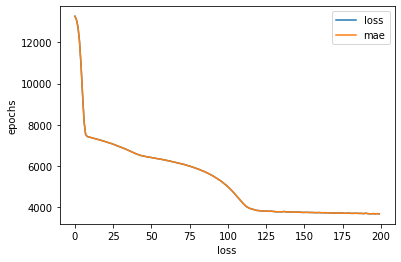

In [ ]:
# Plotting history 

pd.DataFrame(history.history).plot()

plt.xlabel("loss")
plt.ylabel("epochs")
